# Face Recognition App
### 1) Face detection
### 2) Face recognition

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

In [2]:
# Loading the image and changing the colour
image=cv2.imread('bradley.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [3]:
# fd is the feature descripter
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

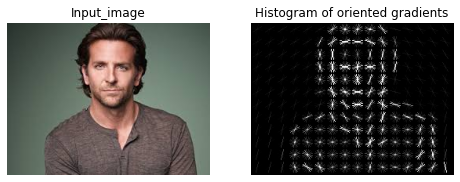

In [4]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input_image')

hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')
plt.show()

In [5]:
len(fd)

1536

In [6]:
image.shape

(194, 259, 3)

# 1) Face Detection

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import face_recognition
import numpy as np
%matplotlib inline

In [8]:
# Finding locations of face in the image using face_recognition
face_locations=face_recognition.face_locations(image)

no_of_faces=len(face_locations)
print('Faces in the image are {}'.format(no_of_faces))

Faces in the image are 1


A face is located at pixel location left=100 top=39 right=163 bottom=101


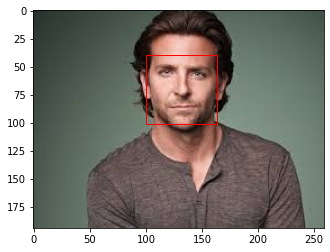

<Figure size 864x864 with 0 Axes>

In [9]:
# Pointing out where the faces are:
plt.imshow(image)
ax=plt.gca()

for fl in face_locations:
    top , right , bottom , left=fl
    x,y,w,h=left,top,right,bottom
    print('A face is located at pixel location left={} top={} right={} bottom={}'.format(x,y,w,h))
    
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
plt.figure(figsize=(12,12))
plt.show()

# 2) Face Recognition

In [10]:
# Loading different images
image=cv2.imread('bradley.jpeg')
face_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('christian-bale_gettyimages-504405052jpg.jpg')
Bale=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('Bradley-Cooper-Hottest-Pictures.jpg')
cooper=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

 Now getting the face encoding :-

In [11]:
face_demo_encoding=face_recognition.face_encodings(face_demo)[0]
Bale_encoding=face_recognition.face_encodings(Bale)[0]
cooper_encoding=face_recognition.face_encodings(cooper)[0]

known_face_encodings=[face_demo_encoding,Bale_encoding,cooper_encoding]


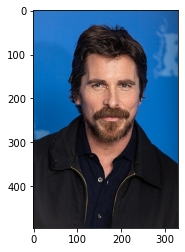

In [12]:
# Test 1
image=cv2.imread('330px-Christian_Bale-7837.jpg')
unknown=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

unknown_encoding=face_recognition.face_encodings(unknown)

In [13]:
from scipy.spatial import distance

for i in unknown_encoding:
    result=[]
    for j in known_face_encodings:
        d=distance.euclidean(j,i)
        print('Euclidean distance : ',d)
        result.append(d)
    threshold=0.6
    result=np.array(result)<=0.6
    
    name='Unknown'
    
    if result[0]:
        name='face demo image'
    elif result[1]:
        name='Cristian Bale'
    elif result[2]:
        name='BRadley Cooper'
    print('Found {} in the photo'.format(name))
print(result)

Euclidean distance :  0.6910542444000742
Euclidean distance :  0.2876570166124404
Euclidean distance :  0.6642480034631625
Found Cristian Bale in the photo
[False  True False]


##### Test 2

Euclidean distance :  0.6425372072882989
Euclidean distance :  0.724746004806109
Euclidean distance :  0.7078522120835434
Found Unknown in the photo
[False False False]


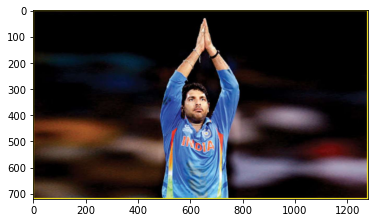

In [14]:
image=cv2.imread('893565-twitter-2.jpg')
unknown=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

unknown_encoding=face_recognition.face_encodings(unknown)

from scipy.spatial import distance

for i in unknown_encoding:
    result=[]
    for j in known_face_encodings:
        d=distance.euclidean(j,i)
        print('Euclidean distance : ',d)
        result.append(d)
    threshold=0.6
    result=np.array(result)<=0.6
    
    name='Unknown'
    
    if result[0]:
        name='face demo image'
    elif result[1]:
        name='Cristian Bale'
    elif result[2]:
        name='BRadley Cooper'
    print('Found {} in the photo'.format(name))
print(result)

#### Test 3 : Multiple images

Euclidean distance :  0.4172592694222211
Euclidean distance :  0.7556718603615991
Euclidean distance :  0.34487094287225767
Found Bradley Cooper in the photo
Euclidean distance :  0.8147257399078224
Euclidean distance :  0.9155571936842788
Euclidean distance :  0.7706291335743402
Found Unknown in the photo
Euclidean distance :  0.6677631504577238
Euclidean distance :  0.3406489741368195
Euclidean distance :  0.635343856225283
Found Cristian Bale in the photo
[False  True False]


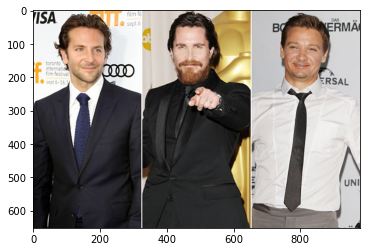

In [15]:
image=cv2.imread('christian-bale-bradley-cooper-jeremy-renner.jpg')
unknown=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)

unknown_encoding=face_recognition.face_encodings(unknown)

from scipy.spatial import distance

for i in unknown_encoding:
    result=[]
    for j in known_face_encodings:
        d=distance.euclidean(j,i)
        print('Euclidean distance : ',d)
        result.append(d)
    threshold=0.6
    result=np.array(result)<=0.6
    
    name='Unknown'
    
    if result[0]:
        name='face demo image'
    if result[1]:
        name='Cristian Bale'
    if result[2]:
        name='Bradley Cooper'
    print('Found {} in the photo'.format(name))
print(result)

# 3) Facial Landmarks

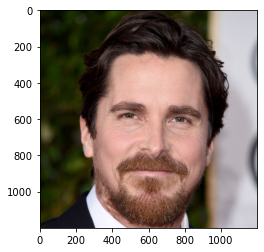

In [16]:
image=cv2.imread('christian-bale_gettyimages-504405052jpg.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
face_landmarks_list=face_recognition.face_landmarks(image)



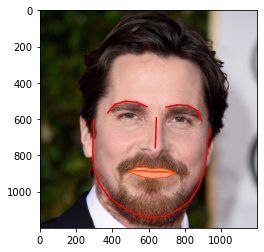

In [21]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon




plt.imshow(image)
ax=plt.gca()


for i in face_landmarks_list:
    left_eyebrow=i['left_eyebrow']
    pre_x,pre_y=left_eyebrow[0]
    for (x,y) in left_eyebrow[1:]:
        #cv2.line(image,(pre_x,pre_y),(x,y),color,thickness)
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        plt.gca().add_line(l)
        pre_x,pre_y=x,y
    
    
    right_eyebrow=i['right_eyebrow']
    pre_x,pre_y=right_eyebrow[0]
    for (x,y) in right_eyebrow[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        plt.gca().add_line(l)
        pre_x,pre_y=x,y
        
    chin=i['chin']
    pre_x,pre_y=chin[0]
    for (x,y) in chin[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        plt.gca().add_line(l)
        pre_x,pre_y=x,y
    
    nose_bridge=i['nose_bridge']
    pre_x,pre_y=nose_bridge[0]
    for (x,y) in nose_bridge[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        plt.gca().add_line(l)
        pre_x,pre_y=x,y
        
    P=Polygon(i['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(P)
    P=Polygon(i['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
    ax.add_patch(P)
plt.show()